In [1]:
# 1. Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# 2. Chargement du dataset
# Assurez-vous que le fichier 'Mall_Customers.csv' est dans le même dossier
data = pd.read_excel('Mall_Customers.csv.xlsx')

# 3. Affichage des premières et dernières lignes
display(data.head())
display(data.tail())


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# 4. Sélection des variables quantitatives
data_quant = data.select_dtypes(include=['int64', 'float64'])
data_quant.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [9]:
# 5. Conversion de la variable 'Annual Income (k$)' en 'Annual Income ($)'
if 'Annual Income (k$)' in data_quant.columns:
    data_quant['Annual Income ($)'] = data_quant['Annual Income (k$)'] * 1000
    data_quant = data_quant.drop('Annual Income (k$)', axis=1)

# 6. Afficher les premières et dernières lignes
display(data_quant.head())
display(data_quant.tail())


,CustomerID,Age,Spending Score (1-100),Annual Income ($)
0,1,19,39,15000
1,2,21,81,15000
2,3,20,6,16000
3,4,23,77,16000
4,5,31,40,17000


,CustomerID,Age,Spending Score (1-100),Annual Income ($)
195,196,35,79,120000
196,197,45,28,126000
197,198,32,74,126000
198,199,32,18,137000
199,200,30,83,137000


In [10]:
# 7. Distance euclidienne
dist_euc = euclidean_distances(data_quant)
print('Matrice de distance euclidienne :', dist_euc.shape)
dist_euc[:5, :5]


Matrice de distance euclidienne : (200, 200)


array([[   0.        ,   42.05948169, 1000.54685048, 1000.73423045,
        2000.04024959],
       [  42.05948169,    0.        , 1002.80955321, 1000.01199993,
        2000.44744995],
       [1000.54685048, 1002.80955321,    0.        ,   71.07038764,
        1000.64029501],
       [1000.73423045, 1000.01199993,   71.07038764,    0.        ,
        1000.71674314],
       [2000.04024959, 2000.44744995, 1000.64029501, 1000.71674314,
           0.        ]])

In [11]:
# 8. Distance de Manhattan
dist_man = manhattan_distances(data_quant)
print('Matrice de distance Manhattan :', dist_man.shape)
dist_man[:5, :5]


Matrice de distance Manhattan : (200, 200)


array([[   0.,   45., 1036., 1045., 2017.],
       [  45.,    0., 1077., 1008., 2054.],
       [1036., 1077.,    0.,   75., 1047.],
       [1045., 1008.,   75.,    0., 1046.],
       [2017., 2054., 1047., 1046.,    0.]])

In [12]:
# 9. Normalisation des données
scaler = MinMaxScaler()
data_n = pd.DataFrame(scaler.fit_transform(data_quant), columns=data_quant.columns)
data_n.head()


,CustomerID,Age,Spending Score (1-100),Annual Income ($)
0,0.000000,0.019231,0.387755,0.000000
1,0.005025,0.057692,0.816327,0.000000
2,0.010050,0.038462,0.051020,0.008197
3,0.015075,0.096154,0.775510,0.008197
4,0.020101,0.250000,0.397959,0.016393


In [13]:
# 10. Recalculer les distances sur données normalisées
dist_euc_norm = euclidean_distances(data_n)
dist_man_norm = manhattan_distances(data_n)

print('Euclidienne normalisée:', dist_euc_norm.shape)
print('Manhattan normalisée:', dist_man_norm.shape)


Euclidienne normalisée: (200, 200)
Manhattan normalisée: (200, 200)


In [14]:
# 11. Similarité cosinus
cos_sim = cosine_similarity(data_n)
print('Matrice de similarité cosinus :', cos_sim.shape)
cos_sim[:5, :5]


Matrice de similarité cosinus : (200, 200)


array([[1.        , 0.99976063, 0.81082652, 0.99703739, 0.87076134],
       [0.99976063, 1.        , 0.82313797, 0.99846521, 0.88107555],
       [0.81082652, 0.82313797, 1.        , 0.85329424, 0.98595063],
       [0.99703739, 0.99846521, 0.85329424, 1.        , 0.9053902 ],
       [0.87076134, 0.88107555, 0.98595063, 0.9053902 , 1.        ]])

In [15]:
# 12. Similarité de corrélation
sim_corr = data_n.T.corr()
sim_corr


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.000000,0.999828,0.787364,0.998149,0.837478,0.999632,-0.214327,0.999711,-0.305142,0.972266,...,-0.665985,0.031567,-0.759716,0.332157,-0.898617,0.081695,-0.819508,-0.013338,-0.681641,0.080139
1,0.999828,1.000000,0.798368,0.999091,0.847102,0.999961,-0.196825,0.999981,-0.288101,0.976333,...,-0.676787,0.016569,-0.770015,0.317258,-0.905285,0.065075,-0.828965,-0.030522,-0.694572,0.062382
2,0.787364,0.798368,1.000000,0.823315,0.995981,0.803002,0.432878,0.801038,0.346081,0.909705,...,-0.941061,-0.541739,-0.981017,-0.288045,-0.961476,-0.534012,-0.990127,-0.619117,-0.987174,-0.550377
3,0.998149,0.999091,0.823315,1.000000,0.868961,0.999383,-0.154879,0.999263,-0.247060,0.984666,...,-0.704477,-0.022656,-0.795205,0.278707,-0.921332,0.023576,-0.851429,-0.072571,-0.724565,0.019843
4,0.837478,0.847102,0.995981,0.868961,1.000000,0.851079,0.354279,0.849351,0.264845,0.941884,...,-0.934195,-0.484584,-0.979830,-0.215781,-0.981014,-0.466802,-0.994669,-0.553897,-0.970690,-0.477539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.081695,0.065075,-0.534012,0.023576,-0.466802,0.058474,-0.973972,0.061671,-0.958904,-0.147065,...,0.673117,0.983601,0.584351,0.962179,0.360597,1.000000,0.504170,0.993044,0.662072,0.985432
196,-0.819508,-0.828965,-0.990127,-0.851429,-0.994669,-0.832625,-0.375398,-0.830851,-0.287968,-0.927343,...,0.963133,0.537112,0.993970,0.264807,0.985633,0.504170,1.000000,0.582943,0.972083,0.498185
197,-0.013338,-0.030522,-0.619117,-0.072571,-0.553897,-0.037520,-0.967091,-0.034276,-0.942503,-0.243508,...,0.726263,0.969271,0.653821,0.924567,0.442615,0.993044,0.582943,1.000000,0.736470,0.990493
198,-0.681641,-0.694572,-0.987174,-0.724565,-0.970690,-0.699954,-0.568557,-0.697607,-0.488793,-0.833545,...,0.959784,0.664901,0.978918,0.436633,0.919229,0.662072,0.972083,0.736470,1.000000,0.674693


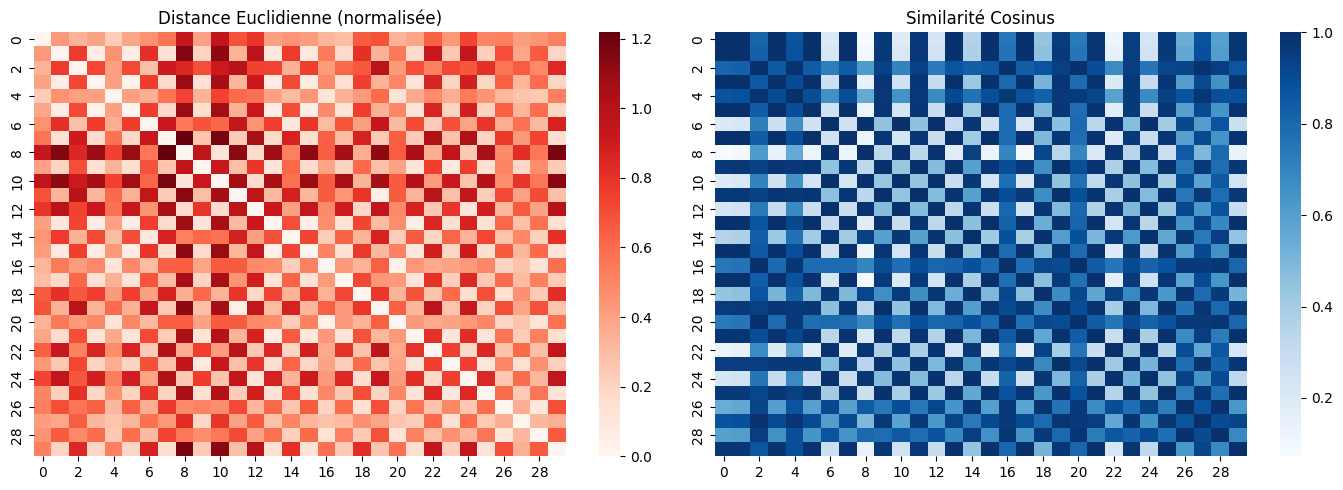

In [16]:
# 13. Visualiser les distances et similarités sous forme de heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(dist_euc_norm[:30, :30], cmap='Reds', ax=axes[0])
axes[0].set_title('Distance Euclidienne (normalisée)')

sns.heatmap(cos_sim[:30, :30], cmap='Blues', ax=axes[1])
axes[1].set_title('Similarité Cosinus')

plt.tight_layout()
plt.show()
